In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from helpers import dataframe, graphing, models as helpers_models
from tensorflow import keras
import numpy as np
from keras import layers, models
from keras.callbacks import EarlyStopping

2023-04-24 07:59:29.732768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 07:59:30.081457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-24 07:59:30.081479: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-24 07:59:31.239859: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

#### Data preprocessing

In [3]:
base_url = "https://raw.githubusercontent.com/italha-d/Stress-Predict-Dataset/main/Raw_data"

subjects = [
    "S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10",
    # "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20",
    # "S21", "S22", "S23", "S24", "S25", "S26", "S27", "S28", "S29", "S30",
    # "S31", "S32", "S33", "S34", "S35"
]

fetch_objects = dataframe.generate_fetch_objects(base_url, subjects)

In [4]:
acc_df, hr_df, eda_df, temp_df, bvp_df = dataframe.concatenate_dataframe_from_fetch_objects(fetch_objects)

df = dataframe.combine_dataframe(acc_df, hr_df, eda_df, temp_df, bvp_df)

df = dataframe.fill_missing_values(df)

Fetching HR.csv for subject S01
Fetching ACC.csv for subject S01
Fetching BVP.csv for subject S01
Fetching EDA.csv for subject S01
Fetching TEMP.csv for subject S01
Fetching HR.csv for subject S02
Fetching ACC.csv for subject S02
Fetching BVP.csv for subject S02
Fetching EDA.csv for subject S02
Fetching TEMP.csv for subject S02
Fetching HR.csv for subject S03
Fetching ACC.csv for subject S03
Fetching BVP.csv for subject S03
Fetching EDA.csv for subject S03
Fetching TEMP.csv for subject S03
Fetching HR.csv for subject S04
Fetching ACC.csv for subject S04
Fetching BVP.csv for subject S04
Fetching EDA.csv for subject S04
Fetching TEMP.csv for subject S04
Fetching HR.csv for subject S05
Fetching ACC.csv for subject S05
Fetching BVP.csv for subject S05
Fetching EDA.csv for subject S05
Fetching TEMP.csv for subject S05
Fetching HR.csv for subject S06
Fetching ACC.csv for subject S06
Fetching BVP.csv for subject S06
Fetching EDA.csv for subject S06
Fetching TEMP.csv for subject S06
Fetching H

In [5]:
tags_object = dataframe.generate_tag_objects(base_url, subjects)

timestamps = dataframe.fetch_timestamps_from_tag_objects(tags_object)

df = dataframe.label_dataframe_from_timestamps(df, timestamps)

#### Initial exploration

In this section, models are tried out for an idea of how well they work on the dataset

In [6]:
# Set index to Subject and Timestamp. This will be used to split the data into train and test sets by subject.
new_df = df.set_index(['Subject', 'Timestamp'])

new_df

X     Y     Z     HR       EDA   TEMP     BVP  Label
Subject Timestamp                                                           
1.0     1.644226e+12 -2.0  43.0  43.0  83.00  0.000000  28.39    0.00    0.0
        1.644226e+12 -2.0  44.0  46.0  83.00  0.000000  28.39    0.00    0.0
        1.644226e+12  2.0  44.0  47.0  83.00  0.000000  28.39    0.00    0.0
        1.644226e+12  3.0  43.0  44.0  83.00  0.000000  28.39    0.00    0.0
        1.644226e+12  1.0  43.0  45.0  83.00  0.000000  28.39    0.00    0.0
...                   ...   ...   ...    ...       ...    ...     ...    ...
10.0    1.644847e+12  3.0  -3.0  63.0  76.53  0.306487  26.89 -115.03    0.0
        1.644847e+12  3.0  -3.0  63.0  76.53  0.306487  26.89 -129.06    0.0
        1.644847e+12  3.0  -3.0  63.0  76.53  0.306487  26.89 -144.23    0.0
        1.644847e+12  3.0  -3.0  63.0  76.53  0.306487  26.89 -155.62    0.0
        1.644847e+12  3.0  -3.0  63.0  76.53  0.306487  26.89 -158.14    0.0

[2113911 rows x 8 columns]

##### Logistic Regression

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets by subject.
train_subjects, test_subjects = train_test_split(new_df.index.get_level_values('Subject').unique(), test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the train set and evaluate it on the test set.
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(new_df.loc[train_subjects].drop('Label', axis=1), new_df.loc[train_subjects]['Label'])

logsitic_regression_score = logistic_regression_model.score(new_df.loc[test_subjects].drop('Label', axis=1), new_df.loc[test_subjects]['Label'])

print('Logistic Regression Accuracy:', logsitic_regression_score)

Logistic Regression Accuracy: 0.7843830873992993


##### Basic LSTM

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

X_train = new_df.loc[train_subjects].drop('Label', axis=1).values
y_train = new_df.loc[train_subjects]['Label'].values
X_test = new_df.loc[test_subjects].drop('Label', axis=1).values
y_test = new_df.loc[test_subjects]['Label'].values

seq_length = 5
batch_size = 32

# Create a TimeseriesGenerator object for the train and test sets.
# This is needed since the data is sequential. It can't be fed into the model like a normal dataset.
train_seq = TimeseriesGenerator(X_train, y_train, length=seq_length, batch_size=batch_size)
test_seq = TimeseriesGenerator(X_test, y_test, length=seq_length, batch_size=batch_size)

In [20]:
model = ml.create_basic_lstm_model((seq_length, X_train.shape[1]))

early_stop = EarlyStopping(monitor='val_accuracy', patience=1)

model_hist = model.fit(train_seq, validation_data=(test_seq), epochs=10, callbacks=[early_stop])

Epoch 1/10
52785/52785 [==============================] - 204s 4ms/step - loss: 0.3268 - accuracy: 0.8204 - val_loss: 0.5206 - val_accuracy: 0.7088
Epoch 2/10
52785/52785 [==============================] - 215s 4ms/step - loss: 0.3015 - accuracy: 0.8406 - val_loss: 0.5675 - val_accuracy: 0.7159
Epoch 3/10
52785/52785 [==============================] - 228s 4ms/step - loss: 0.2938 - accuracy: 0.8474 - val_loss: 0.4846 - val_accuracy: 0.7179
Epoch 4/10
52785/52785 [==============================] - 217s 4ms/step - loss: 0.2866 - accuracy: 0.8517 - val_loss: 0.5297 - val_accuracy: 0.7235
Epoch 5/10
52785/52785 [==============================] - 219s 4ms/step - loss: 0.2813 - accuracy: 0.8564 - val_loss: 0.4837 - val_accuracy: 0.7168
Epoch 6/10
52785/52785 [==============================] - 236s 4ms/step - loss: 0.2781 - accuracy: 0.8583 - val_loss: 0.4959 - val_accuracy: 0.7242
Epoch 7/10
52785/52785 [==============================] - 238s 5ms/step - loss: 0.2761 - accuracy: 0.8603 - val_

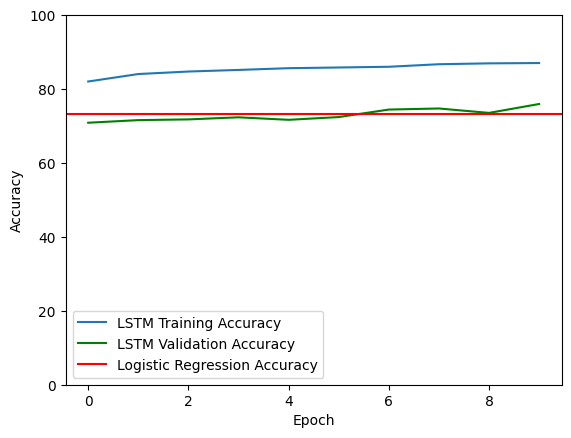

In [28]:
graphing.plot_keras_model_logistic_regression_accuracy(
    model_hist,
    logsitic_regression_score,
    ['LSTM Training Accuracy', 'LSTM Validation Accuracy', 'Logistic Regression Accuracy']
)

##### Multi-layered LSTM

In [24]:
lstm_dropout_model = ml.create_lstm_dropout_model((seq_length, X_train.shape[1]))

early_stop = EarlyStopping(monitor='val_accuracy', patience=1)

lstm_dropout_model_hist = lstm_dropout_model.fit(train_seq, validation_data=(test_seq), epochs=10, callbacks=[early_stop])

Epoch 1/10
52785/52785 [==============================] - 411s 8ms/step - loss: 0.3174 - accuracy: 0.8317 - val_loss: 0.5300 - val_accuracy: 0.7191
Epoch 2/10
52785/52785 [==============================] - 345s 7ms/step - loss: 0.2859 - accuracy: 0.8567 - val_loss: 0.5150 - val_accuracy: 0.7284
Epoch 3/10
52785/52785 [==============================] - 432s 8ms/step - loss: 0.2684 - accuracy: 0.8698 - val_loss: 0.5281 - val_accuracy: 0.7371
Epoch 4/10
52785/52785 [==============================] - 438s 8ms/step - loss: 0.2561 - accuracy: 0.8786 - val_loss: 0.4817 - val_accuracy: 0.7469
Epoch 5/10
52785/52785 [==============================] - 402s 8ms/step - loss: 0.2486 - accuracy: 0.8834 - val_loss: 0.5512 - val_accuracy: 0.7301


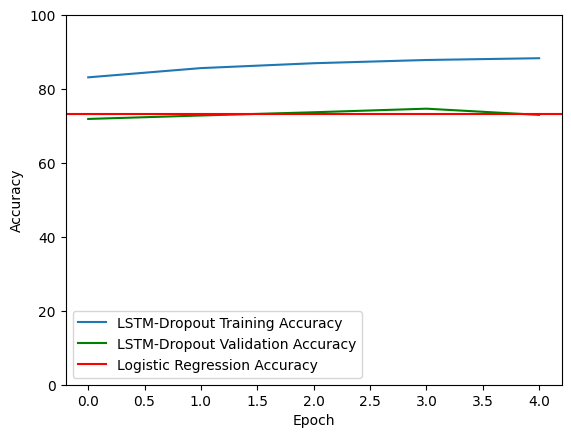

In [29]:
graphing.plot_keras_model_logistic_regression_accuracy(
    lstm_dropout_model_hist,
    logsitic_regression_score,
    ['LSTM-Dropout Training Accuracy', 'LSTM-Dropout Validation Accuracy', 'Logistic Regression Accuracy'],
    'lstm_dropout_log_reg.png'
)

### Cross Validation

##### Logistic Regression

In [13]:
logistic_regression_scores = ml.run_logistic_regression_kfold_cross_validation(df)

Fold 0
Train Subjects: [0 1 2 3 4 5 7 9]
Test Subjects: [6 8]
Accuracy: 0.7168909151562326


Fold 1
Train Subjects: [0 2 4 5 6 7 8 9]
Test Subjects: [1 3]
Accuracy: 0.7503152525226139


Fold 2
Train Subjects: [0 1 2 3 5 6 8 9]
Test Subjects: [4 7]
Accuracy: 0.7881421568295387


Fold 3
Train Subjects: [1 3 4 5 6 7 8 9]
Test Subjects: [0 2]
Accuracy: 0.7118014164504592


Fold 4
Train Subjects: [0 1 2 3 4 6 7 8]
Test Subjects: [5 9]
Accuracy: 0.7161843339360479




In [14]:
print('Average Accuracy: {}'.format(np.mean(logistic_regression_scores)))

Average Accuracy: 0.7366668149789785


##### Basic LSTM

In [35]:
from sklearn.model_selection import KFold

n_folds = 5
seq_length = 5

trained_models = []
model_scores = []

subject_kfold = KFold(n_splits=n_folds, shuffle=True)

for fold, (train_subjects, test_subjects) in enumerate(subject_kfold.split(df['Subject'].unique())):
    print('Fold {}'.format(fold))
    print('Train Subjects: {}'.format(train_subjects))
    print('Test Subjects: {}'.format(test_subjects))

    train_data = df[df['Subject'].isin(train_subjects)]
    test_data = df[df['Subject'].isin(test_subjects)]

    # Create a train_dataset from the timeseries util function.
    # Timeseries datasets are needed since the data is sequential.
    # Normal datasets can't be used as the model needs to know the sequence of the data.
    train_dataset = keras.utils.timeseries_dataset_from_array(
      train_data,
      targets=train_data['Label'],
      sampling_rate=1,
      sequence_length=seq_length,
    )

    test_dataset = keras.utils.timeseries_dataset_from_array(
      test_data,
      targets=test_data['Label'],
      sampling_rate=1,
      sequence_length=seq_length,
    )
    
    model = ml.create_basic_lstm_model((seq_length, len(df.columns)))

    model_hist = model.fit(train_dataset, validation_data=(test_dataset), epochs=4)
    trained_models.append(model_hist)


Fold 0
Train Subjects: [0 1 2 3 4 5 6 9]
Test Subjects: [7 8]
Epoch 1/4
11734/11734 [==============================] - 97s 8ms/step - loss: 0.3557 - accuracy: 0.8090 - val_loss: 1.1241 - val_accuracy: 0.8072
Epoch 2/4
11734/11734 [==============================] - 125s 11ms/step - loss: 0.4029 - accuracy: 0.8014 - val_loss: 1.1240 - val_accuracy: 0.8072
Epoch 3/4
11734/11734 [==============================] - 141s 12ms/step - loss: 0.4029 - accuracy: 0.8014 - val_loss: 1.1240 - val_accuracy: 0.8072
Epoch 4/4
11734/11734 [==============================] - 140s 12ms/step - loss: 0.4029 - accuracy: 0.8014 - val_loss: 1.1240 - val_accuracy: 0.8072
Fold 1
Train Subjects: [0 1 4 5 6 7 8 9]
Test Subjects: [2 3]
Epoch 1/4
11555/11555 [==============================] - 146s 12ms/step - loss: 0.3817 - accuracy: 0.7849 - val_loss: 1.3123 - val_accuracy: 0.7477
Epoch 2/4
11555/11555 [==============================] - 156s 14ms/step - loss: 0.4543 - accuracy: 0.7695 - val_loss: 1.3119 - val_accurac

In [45]:
accuracies = [model.history.history['val_accuracy'][-1] for model in trained_models]

print('Average Accuracy: {}'.format(np.mean(accuracies)))

Average Accuracy: 0.7452800750732422


##### Multi-layered LSTM

In [19]:
from sklearn.model_selection import KFold

n_folds = 5
seq_length = 5

trained_models = []
model_histories = []

subject_kfold = KFold(n_splits=n_folds, shuffle=True)

for fold, (train_subjects, test_subjects) in enumerate(subject_kfold.split(df['Subject'].unique())):
    print('Fold {}'.format(fold))
    print('Train Subjects: {}'.format(train_subjects))
    print('Test Subjects: {}'.format(test_subjects))

    train_data = df[df['Subject'].isin(train_subjects)]
    test_data = df[df['Subject'].isin(test_subjects)]

    train_dataset = keras.utils.timeseries_dataset_from_array(
      train_data,
      targets=train_data['Label'],
      sampling_rate=1,
      sequence_length=seq_length,
    )

    test_dataset = keras.utils.timeseries_dataset_from_array(
      test_data,
      targets=test_data['Label'],
      sampling_rate=1,
      sequence_length=seq_length,
    )
    
    model = ml.create_lstm_dropout_model((seq_length, len(df.columns)))

    early_stop = EarlyStopping(monitor='val_accuracy', patience=1)

    model_hist = model.fit(train_dataset, validation_data=(test_dataset), epochs=4, callbacks=[early_stop])
    
    trained_models.append(model)
    model_histories.append(model_hist)

    print('\n')


Fold 0
Train Subjects: [0 2 3 4 5 6 8 9]
Test Subjects: [1 7]
Epoch 1/4
11676/11676 [==============================] - 110s 9ms/step - loss: 0.3025 - accuracy: 0.8339 - val_loss: 1.9176 - val_accuracy: 0.7835
Epoch 2/4
11676/11676 [==============================] - 124s 11ms/step - loss: 0.3295 - accuracy: 0.8206 - val_loss: 1.9639 - val_accuracy: 0.7835


Fold 1
Train Subjects: [0 1 2 4 5 6 7 9]
Test Subjects: [3 8]
Epoch 1/4
11765/11765 [==============================] - 158s 13ms/step - loss: 0.3270 - accuracy: 0.8171 - val_loss: 1.9297 - val_accuracy: 0.7736
Epoch 2/4
11765/11765 [==============================] - 166s 14ms/step - loss: 0.3446 - accuracy: 0.8043 - val_loss: 2.3116 - val_accuracy: 0.7736


Fold 2
Train Subjects: [0 1 2 3 5 6 7 8]
Test Subjects: [4 9]
Epoch 1/4
11634/11634 [==============================] - 162s 14ms/step - loss: 0.3316 - accuracy: 0.8059 - val_loss: 2.7158 - val_accuracy: 0.6863
Epoch 2/4
11634/11634 [==============================] - 156s 13ms/step

In [20]:
lstm_dropout_accuracies = [model.history.history['val_accuracy'][-1] for model in trained_models]

print('Average Accuracy: {}'.format(np.mean(lstm_dropout_accuracies)))

Average Accuracy: 0.7376067757606506


#### Removing potentially unnecessary features

In [9]:
# Remove the accelerometer data from the dataframe (X, Y, Z)
df_no_accel = df.drop(columns=['X', 'Y', 'Z'], axis=1)

df_no_accel.head()

,Timestamp,Subject,HR,EDA,TEMP,BVP,Label
0,1.644226e+12,1.0,83.0,0.0,28.39,0.0,0.0
1,1.644226e+12,1.0,83.0,0.0,28.39,0.0,0.0
2,1.644226e+12,1.0,83.0,0.0,28.39,0.0,0.0
3,1.644226e+12,1.0,83.0,0.0,28.39,0.0,0.0
4,1.644226e+12,1.0,83.0,0.0,28.39,0.0,0.0


In [10]:
lr_no_accel_scores = ml.run_logistic_regression_kfold_cross_validation(df_no_accel)

Fold 0
Train Subjects: [0 2 4 5 6 7 8 9]
Test Subjects: [1 3]
Accuracy: 0.7503152525226139


Fold 1
Train Subjects: [0 1 2 3 6 7 8 9]
Test Subjects: [4 5]
Accuracy: 0.7583334861291919


Fold 2
Train Subjects: [0 1 3 4 5 6 7 9]
Test Subjects: [2 8]
Accuracy: 0.7345796307680843


Fold 3
Train Subjects: [0 1 2 3 4 5 6 8]
Test Subjects: [7 9]
Accuracy: 0.7482551429557271


Fold 4
Train Subjects: [1 2 3 4 5 7 8 9]
Test Subjects: [0 6]
Accuracy: 0.67566447919707




In [11]:
print('Average Accuracy: {}'.format(np.mean(lr_no_accel_scores)))

Average Accuracy: 0.7334295983145375


In [12]:
# Remove the BVP data from the dataframe
df_no_bvp = df.drop(columns=['BVP'], axis=1)

df_no_bvp.head()

,X,Y,Z,Timestamp,Subject,HR,EDA,TEMP,Label
0,-2.0,43.0,43.0,1.644226e+12,1.0,83.0,0.0,28.39,0.0
1,-2.0,44.0,46.0,1.644226e+12,1.0,83.0,0.0,28.39,0.0
2,2.0,44.0,47.0,1.644226e+12,1.0,83.0,0.0,28.39,0.0
3,3.0,43.0,44.0,1.644226e+12,1.0,83.0,0.0,28.39,0.0
4,1.0,43.0,45.0,1.644226e+12,1.0,83.0,0.0,28.39,0.0


In [13]:
lr_no_bvp_scores = ml.run_logistic_regression_kfold_cross_validation(df_no_bvp)

Fold 0
Train Subjects: [0 1 3 4 5 7 8 9]
Test Subjects: [2 6]
Accuracy: 0.6943790030821747


Fold 1
Train Subjects: [0 2 3 4 6 7 8 9]
Test Subjects: [1 5]
Accuracy: 0.7523489098955297


Fold 2
Train Subjects: [1 2 3 4 5 6 8 9]
Test Subjects: [0 7]
Accuracy: 0.8507451647498243


Fold 3
Train Subjects: [0 1 2 3 5 6 7 9]
Test Subjects: [4 8]
Accuracy: 0.7434354626441416


Fold 4
Train Subjects: [0 1 2 4 5 6 7 8]
Test Subjects: [3 9]
Accuracy: 0.7143529762205039




In [14]:
print('Average Accuracy: {}'.format(np.mean(lr_no_bvp_scores)))

Average Accuracy: 0.7510523033184348
